Date : 27 Feb 2026

# Linear Discriminant Analysis

# IRIS DATASET

In [44]:
from sklearn.datasets import load_iris
import pandas as pd
import time
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Loading Iris dataset
iris = load_iris()
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['target'] = iris.target

df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [35]:
df["target"].unique()

array([0, 1, 2])

### Without LDA (RF On original data)

Random Forest without LDA
Accuracy: 0.8889
Training time: 0.0547 seconds
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.78      0.93      0.85        15
           2       0.92      0.73      0.81        15

    accuracy                           0.89        45
   macro avg       0.90      0.89      0.89        45
weighted avg       0.90      0.89      0.89        45



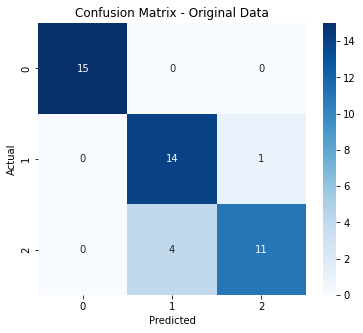

In [39]:
# Loading Iris dataset
iris = load_iris()
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['target'] = iris.target

# Split features and target
X = df.drop(columns=["target"])
y = df["target"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Training Random Forest and measure time
rf = RandomForestClassifier(n_estimators=100, random_state=42)

start_time = time.time()
rf.fit(X_train_scaled, y_train)
end_time = time.time()
training_time = end_time - start_time

# Predict on test set
y_pred = rf.predict(X_test_scaled)

# Accuracy and Classification Report
accuracy = accuracy_score(y_test, y_pred)
print("Random Forest without LDA")
print("Accuracy:", round(accuracy, 4))
print("Training time: {:.4f} seconds".format(training_time))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Original Data")
plt.show()

### After LDA 

Time taken for LDA fit & transform: 0.0000 seconds
Time taken to train Random Forest on LDA data: 0.0727 seconds
Random Forest with LDA
Accuracy: 0.9778
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.94      1.00      0.97        15
           2       1.00      0.93      0.97        15

    accuracy                           0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



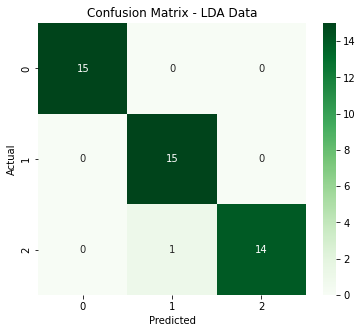

In [45]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# Load Iris dataset
iris = load_iris()
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['target'] = iris.target

# Split features and target
X = df.drop(columns=["target"])
y = df["target"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Apply LDA (fit_transform on train, transform on test)
lda = LinearDiscriminantAnalysis(n_components=2)  
start_time = time.time()
X_train_lda = lda.fit_transform(X_train_scaled, y_train)
X_test_lda = lda.transform(X_test_scaled)
end_time = time.time()
lda_time = end_time - start_time
print(f"Time taken for LDA fit & transform: {lda_time:.4f} seconds")

# Train Random Forest on LDA data
rf_lda = RandomForestClassifier(n_estimators=100, random_state=42)
start_time = time.time()
rf_lda.fit(X_train_lda, y_train)
y_pred_lda = rf_lda.predict(X_test_lda)
rf_time = time.time() - start_time
print(f"Time taken to train Random Forest on LDA data: {rf_time:.4f} seconds")

# Accuracy and Classification Report
accuracy_lda = accuracy_score(y_test, y_pred_lda)
print("Random Forest with LDA")
print("Accuracy:", round(accuracy_lda, 4))
print("Classification Report:\n", classification_report(y_test, y_pred_lda))

# Confusion Matrix
cm_lda = confusion_matrix(y_test, y_pred_lda)
plt.figure(figsize=(6,5))
sns.heatmap(cm_lda, annot=True, fmt="d", cmap="Greens")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - LDA Data")
plt.show()

Ans : Random Forest on LDA-transformed data achieved 97.8% accuracy, higher than 88.9% on the original features. LDA improved class separation and Computaion time is increased as comapred to RF on org df

# PCA On Iris Dataset

Training time (PCA data): 0.11606097221374512 seconds
Accuracy (PCA Data): 0.9

Classification Report (PCA Data):
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.89      0.80      0.84        10
           2       0.82      0.90      0.86        10

    accuracy                           0.90        30
   macro avg       0.90      0.90      0.90        30
weighted avg       0.90      0.90      0.90        30



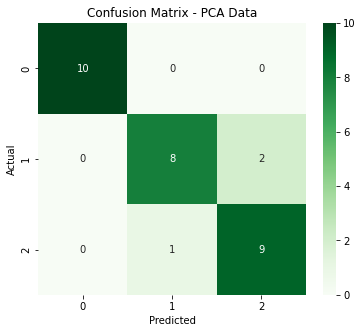

Number of principal components used: 2


In [48]:
from sklearn.decomposition import PCA
# Split data
X = df.drop(columns=["target"])
y = df["target"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Scale features 
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Apply PCA to retain 95% variance
pca = PCA(n_components=0.95, random_state=42)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Train Random Forest on PCA-transformed data
rf = RandomForestClassifier(n_estimators=200, random_state=43, class_weight="balanced")
rf.fit(X_train_pca, y_train)

# Training Time
start = time.time()
rf.fit(X_train_pca, y_train)      
end = time.time()
print("Training time (PCA data):", end - start, "seconds")


# Predict and evaluate
y_pred = rf.predict(X_test_pca)
print("Accuracy (PCA Data):", accuracy_score(y_test, y_pred))
print("\nClassification Report (PCA Data):\n", classification_report(y_test, y_pred))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Greens")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - PCA Data")
plt.show()

print("Number of principal components used:", pca.n_components_)

Ans : On the Iris dataset, Random Forest achieved 88.9% accuracy on original features. PCA improved it slightly to 90% by reducing dimensionality, while LDA increased accuracy to 97.8% by maximizing class separation, giving better F1-scores for all classes with minimal extra computation.

# HEALTH RISK DATASET

In [24]:
df2=pd.read_csv("health_risk_data.csv")
df2.head()

,age,bmi,waist_circumference,systolic_bp,diastolic_bp,mean_arterial_pressure,fasting_glucose,hba1c,glucose_monitor_avg,total_cholesterol,ldl_cholesterol,hdl_cholesterol,resting_hr,activity_hr,device_artifact_signal,measurement_variability_index,risk_label
0,49.967142,30.753135,106.721491,109.173937,81.851755,89.232162,110.140405,7.747751,111.790974,204.189550,142.602432,57.177317,48.024990,67.708474,0.906834,1.174814,1
1,43.617357,24.935821,94.149756,122.652313,84.254449,96.991330,98.852093,7.434487,94.782039,201.950739,136.329015,54.816690,82.687139,102.294197,-1.451835,-1.878981,0
2,51.476885,27.384483,92.615870,111.799799,82.222899,92.117899,72.091030,6.598568,70.262644,224.398412,155.355139,69.802697,71.902232,97.894075,-0.664701,-0.327795,0
3,60.230299,25.150899,84.032186,115.925173,92.788658,101.446091,85.841781,7.366348,88.363135,174.684384,129.426386,55.580815,66.203755,86.275437,-0.121075,-0.041660,0
4,42.658466,25.262015,86.003335,145.101781,70.476836,92.618101,94.745065,7.467980,97.352312,147.689822,116.161442,46.307795,78.571584,96.463672,1.365560,0.015909,0


### Random Forest WITHOUT LDA

Random Forest WITHOUT LDA
Accuracy: 0.6312
Training time: 0.2490 seconds
Classification Report:
               precision    recall  f1-score   support

           0       0.68      0.74      0.71        96
           1       0.55      0.47      0.50        64

    accuracy                           0.63       160
   macro avg       0.61      0.60      0.61       160
weighted avg       0.62      0.63      0.63       160



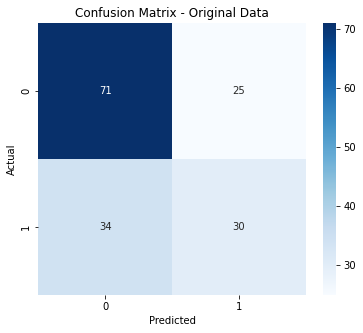

In [41]:
import pandas as pd
import time
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Assuming df is already loaded with your data
X = df2.drop(columns=["risk_label"])
y = df2["risk_label"]

# Split train/test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train Random Forest and measure time
rf = RandomForestClassifier(n_estimators=200, random_state=42, class_weight="balanced")
start_time = time.time()
rf.fit(X_train_scaled, y_train)
end_time = time.time()
training_time_no_lda = end_time - start_time

# Predict & evaluate
y_pred_no_lda = rf.predict(X_test_scaled)
accuracy_no_lda = accuracy_score(y_test, y_pred_no_lda)

print("Random Forest WITHOUT LDA")
print("Accuracy:", round(accuracy_no_lda,4))
print("Training time: {:.4f} seconds".format(training_time_no_lda))
print("Classification Report:\n", classification_report(y_test, y_pred_no_lda))

# Confusion matrix
cm_no_lda = confusion_matrix(y_test, y_pred_no_lda)
plt.figure(figsize=(6,5))
sns.heatmap(cm_no_lda, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Original Data")
plt.show()

### Random Forest WITH LDA

Time for LDA fit & transform: 0.0020 seconds
Random Forest WITH LDA
Accuracy: 0.6062
Training time for RF after LDA: 0.1738 seconds
Classification Report:
               precision    recall  f1-score   support

           0       0.69      0.64      0.66        96
           1       0.51      0.56      0.53        64

    accuracy                           0.61       160
   macro avg       0.60      0.60      0.60       160
weighted avg       0.61      0.61      0.61       160



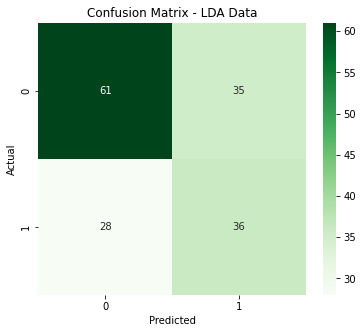

In [42]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# LDA reduces features (binary classification -> 1 component)
lda = LinearDiscriminantAnalysis(n_components=1)

# Fit-transform on train, transform on test
start_time = time.time()
X_train_lda = lda.fit_transform(X_train_scaled, y_train)
X_test_lda = lda.transform(X_test_scaled)
end_time = time.time()
lda_time = end_time - start_time
print(f"Time for LDA fit & transform: {lda_time:.4f} seconds")

# Train RF on LDA data
rf_lda = RandomForestClassifier(n_estimators=200, random_state=42, class_weight="balanced")
start_time = time.time()
rf_lda.fit(X_train_lda, y_train)
end_time = time.time()
training_time_lda = end_time - start_time

# Predict & evaluate
y_pred_lda = rf_lda.predict(X_test_lda)
accuracy_lda = accuracy_score(y_test, y_pred_lda)

print("Random Forest WITH LDA")
print("Accuracy:", round(accuracy_lda,4))
print("Training time for RF after LDA: {:.4f} seconds".format(training_time_lda))
print("Classification Report:\n", classification_report(y_test, y_pred_lda))

# Confusion matrix
cm_lda = confusion_matrix(y_test, y_pred_lda)
plt.figure(figsize=(6,5))
sns.heatmap(cm_lda, annot=True, fmt="d", cmap="Greens")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - LDA Data")
plt.show()

Ans : Random Forest on original data achieved slightly higher accuracy (63.1%) than on LDA-transformed data (60.6%). LDA reduced dimensionality but did not improve performance, likely because it’s a binary supervised reduction and some useful information was lost. RF trained slightly faster on LDA data, but the accuracy drop suggests that for this dataset, using all features works better.